### Import Libraries

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import random_rotation, random_shear, random_shift, random_zoom

import warnings
warnings.filterwarnings("ignore")

### Load and Prepare the Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_samples, nx, ny = x_train.shape
n_samples_test, nx_test, ny_test = x_test.shape

x_train = x_train.reshape((n_samples, nx, ny, 1))
y_train = to_categorical(y_train)

x_test = x_test.reshape((n_samples_test, nx_test, ny_test, 1))
y_test = to_categorical(y_test)

In [11]:
def augment_data(dataset, dataset_labels, augementation_factor=1, use_random_rotation=True, use_random_shear=True, use_random_shift=True, use_random_zoom=True):
    augmented_image = []
    augmented_image_labels = []

    for num in range (0, dataset.shape[0]):

        for i in range(0, augementation_factor):
            # original image:
            augmented_image.append(dataset[num])
            augmented_image_labels.append(dataset_labels[num])

            if use_random_rotation:
                augmented_image.append(random_rotation(dataset[num], 20, row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])

            if use_random_shear:
                augmented_image.append(random_shear(dataset[num], 0.2, row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])

            if use_random_shift:
                augmented_image.append(random_shift(dataset[num], 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])

            if use_random_zoom:
                augmented_image.append(random_zoom(dataset[num], (1.5, 1.5), row_axis=0, col_axis=1, channel_axis=2))
                augmented_image_labels.append(dataset_labels[num])

    return np.array(augmented_image), np.array(augmented_image_labels)

In [12]:
x_aug, y_aug = augment_data(x_train, y_train)

In [17]:
x_aug = x_aug.astype('float32')
X_test = x_test.astype('float32')
x_aug /= 255
X_test /= 255

### Function to Create CNN model

In [55]:
def get_model():
    cnn = Sequential()
    cnn.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(nx, ny, 1)))
    cnn.add(Conv2D(32, 3, padding='same', activation='relu'))
    cnn.add(MaxPool2D())
    cnn.add(Conv2D(64, 3, padding='same', activation='relu'))
    cnn.add(Conv2D(64, 3, padding='same', activation='relu'))
    cnn.add(MaxPool2D())
    cnn.add(Dropout(0.25))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(10, activation='softmax'))
    cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return cnn

### Train the Model

In [56]:
model = get_model()
history = model.fit(x_aug, y_aug, epochs=1, batch_size=32, validation_data=(x_test, y_test), verbose=1)
_, acc = model.evaluate(testX, testY, verbose=0)

9375/9375 [==============================] - 230s 25ms/step - loss: 0.1231 - accuracy: 0.9642 - val_loss: 4.1505 - val_accuracy: 0.9928


In [57]:
model.save("model.h5")

In [48]:
for hist in histories:
#     print(hist.history.keys())
    print(np.mean(hist.history['val_accuracy']))

0.989091670513153
0.9893466651439666
0.989618331193924
0.9897316694259644
0.9892883360385895


### Plot Results

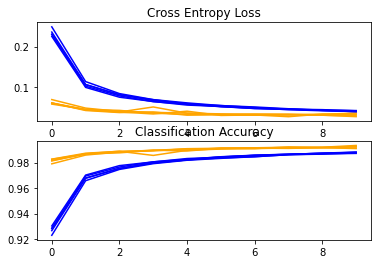

In [23]:
for i in range(len(histories)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [29]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

Accuracy: mean=99.227 std=0.087, n=5


In [30]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Loss = {loss}')
print(f'Accuracy = {acc}')

Loss = 765.1139526367188
Accuracy = 0.7120000123977661


### Classification Report and Confusion Matrix

In [31]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

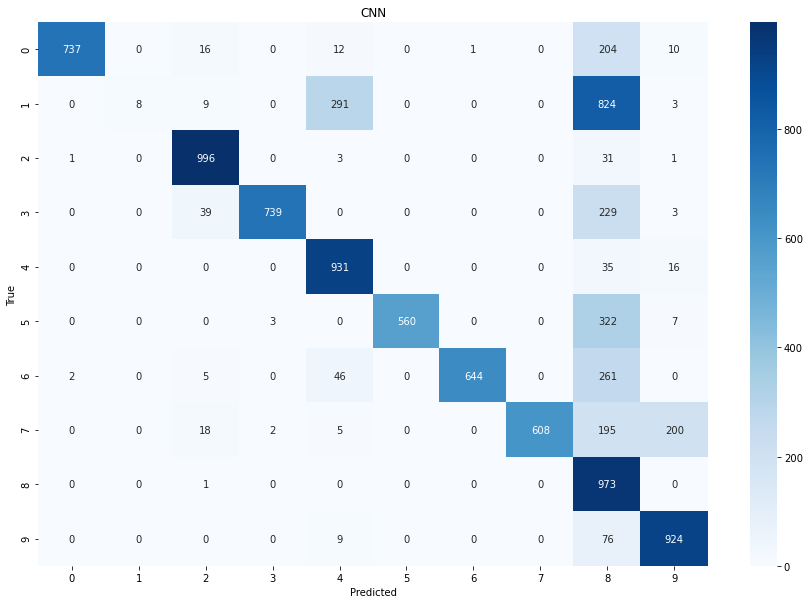

In [32]:
mtx = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('CNN');